#### 단순 회귀분석 실습
전기생산량(연속형)과 전기사용량(연속형) 예측   
연속형, 연속형 > 회귀분석   
독립변수(전기생산량) 1개 > 단순 회귀분석   
   
- 귀무가설 : 전기생산량과 전기소비량 간에 상관관계가 없다.
- 대립가설 : 전기생산량과 전기소비량 간에 상관관계가 있다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import sklearn

from scipy import stats
#scipy 과학컴퓨팅, 기술컴퓨팅 라이브러리

%matplotlib inline

#pip install watermark
#conda install -c conda-forge watermark

%load_ext watermark
#watermark extension 로딩

%watermark 
#파이썬 버전, OS, 시스템 정보 출력

%watermark -d -t
#시스템의 날짜 시간 정보

%watermark -p -numpy, scipy, sklearn, pandas, matplotlib

Last updated: 2022-03-23T18:21:28.633913+09:00

Python implementation: CPython
Python version       : 3.7.11
IPython version      : 7.32.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 21.4.0
Machine     : x86_64
Processor   : i386
CPU cores   : 10
Architecture: 64bit




UsageError: argument -p/--packages: expected one argument


In [2]:
#월별 전기 생산금액(억원)
x = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]
#월별 전기 사용량(백만Kwh)
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]

기울기 slope   
절편 intercept   
상관계수 r_value   
예측불확실성 p_value (0.05미만일 때, 통계학적으로 유의미)  
에러의 표준편자 stderr (실제값과 예측값의 평균적인 차이)   
선형회귀분석 linregress(x:독립변수,y:종속변수)   
   
   
**pvalue가 9.23.....e-0.5이므로 0.05보다 작다**   
> e 부동소수점, 과학계산에서 주로 이용 e-05 면 10에 5승을 나누어주고 e+05면 10에 5승을 곱해준다.   

귀무가설을 기각하고 **대립가설을 채택** 한다.   
   
##### 결론
전기생산량과 전기소비량간에 상관관계가 있다.   
- 상관분석 : 두 변수 간에 어떤 선형적 관계가 있는지 분석
- 상관계수(rvalue) : 상관관계의 정도를 파악하는 값 (-1 ~ 1 사이)

In [4]:
result = stats.linregress(x,y)
result

LinregressResult(slope=0.4956032360182905, intercept=0.9195814280689418, rvalue=0.8929235125385305, pvalue=9.238421943157891e-05, stderr=0.07901935226531728, intercept_stderr=0.3110591892275586)

In [20]:
#slope, intercept, r_value, p_value, stderr, intercept_stderr = stats.linregress(x,y)
#ValueError: not enough values to unpack (expected 6, got 5)
slope, intercept, r_value, p_value, stderr = stats.linregress(x,y)

Text(0, 0.5, 'electricity consumption')

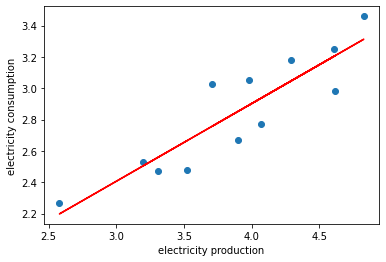

In [23]:
#ss(x,y)
# ss? 

x1 = np.array(x)

#산점도 그리기
plt.scatter(x,y)

#회귀선 그리기
plt.plot(x1, slope * x1 + intercept, c='red')

plt.xlabel('electricity production') #전기생산량
plt.ylabel('electricity consumption') #전기소비량

In [24]:
#생산량이 4일 때 전기사용량 예측 y=ax+b
4 * slope + intercept

2.901994372142104